In [2]:
f(x) = 2 .* x.^3 .- 3 .* x .+ 1

f (generic function with 1 method)

In [3]:
x = [-10, 2, 5, 7]
y = f(x)

4-element Vector{Int64}:
 -1969
    11
   236
   666

In [4]:
function L(v, x, j)
    l = 1
    for i in 1:length(x)
        if i != j
            l *= v - x[i]
            l /= x[j] - x[i]
        end
    end
    return l
end

L (generic function with 1 method)

In [5]:
function Qn(v, x, y)
    Q = 0
    for j in 1:length(y)
        Q += y[j] * L(v, x, j)
    end
    return Q
end    

Qn (generic function with 1 method)

In [6]:
println("True value = $(f(3.3)), Estimated = $(Qn(3.3, x, y))")

True value = 62.974, Estimated = 62.97399999999999


In [7]:
using Plots

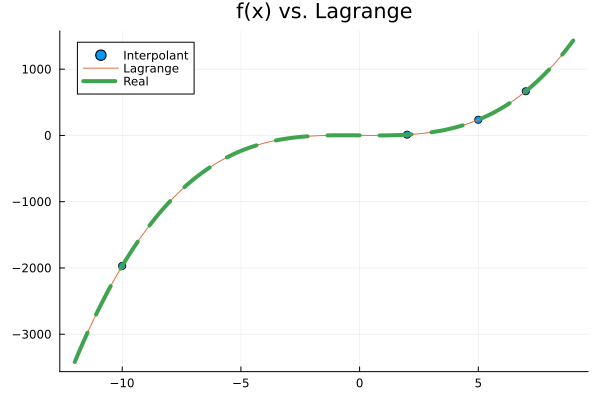

In [8]:
Xs = -12.0:0.125:9.0
y_real = f(Xs)
y_pred = [Qn(v, x, y) for v in Xs]

scatter(x, y, label="Interpolant", title="f(x) vs. Lagrange")
plot!(Xs, y_pred, label="Lagrange")
plot!(Xs, y_real, label="Real", linestyle=:dash, linewidth=4)

What if we interpolate from a dataset with one missing point?

In [11]:
x_ = [-10, 5, 7]
y_ = f(x_)

3-element Vector{Int64}:
 -1969
   236
   666

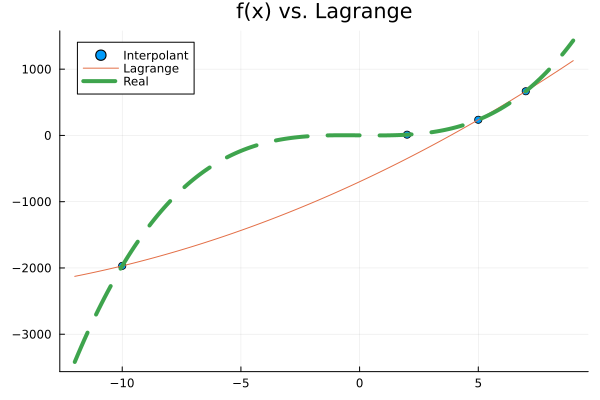

In [12]:
Xs = -12.0:0.125:9.0
y_real = f(Xs)
y_pred = [Qn(v, x_, y_) for v in Xs]

scatter(x, y, label="Interpolant", title="f(x) vs. Lagrange")
plot!(Xs, y_pred, label="Lagrange")
plot!(Xs, y_real, label="Real", linestyle=:dash, linewidth=4)